In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=d2e2ea2f4b98cbdb9ecc6afc294c6d9ca37984bf9af2c7168a7e7be72d692369
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/imp_docs/Shuffled Final Target non target Features1.xlsx')
data.head()

,Node,Entry_Names,DEGREE CENTRALITY (DC),BETWEENNESS CENTRALITY (BC),EIGENVECTOR CENTRALITY (EVC),PAGERANK PRESTIGE (PRP),PROXIMITY PRESTIGE (PP),INFLUENCE RANGE CLOSENESS CENTRALITY (IRCC),POWER CENTRALITY (PC),Katz Cent,...,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y,Label
0,1,A0A024RBS3,0.000000,0,0.000000,0.000047,0.001328,0.000000,0.000000,0.012550,...,2.34,12.63,4.77,6.60,9.89,5.44,3.97,0.44,2.30,0
1,2,A0A0S2Z6U5,0.119241,0,0.000761,0.000090,7.347380,19.305824,7.779096,0.012496,...,3.20,3.91,1.07,4.98,6.05,6.05,6.05,0.00,2.85,0
2,3,P27105,0.045286,2087,0.000250,0.000048,7.610910,18.669016,7.999056,0.012397,...,2.78,4.17,4.17,5.90,6.94,6.94,5.90,1.04,1.39,1
3,4,O43633,0.330409,2,0.000000,0.000133,3.156878,0.010172,0.482935,0.012975,...,4.05,1.35,6.31,8.56,4.95,3.60,4.50,0.00,0.45,1
4,5,A1L3X4,0.000000,0,0.000000,0.000041,9.783009,0.000000,0.000000,0.012348,...,2.04,2.04,2.04,0.00,14.29,8.16,0.00,0.00,2.04,0


In [ ]:
data.drop(['Node', 'Entry_Names'],axis = 1,inplace=True)
data.head()

,DEGREE CENTRALITY (DC),BETWEENNESS CENTRALITY (BC),EIGENVECTOR CENTRALITY (EVC),PAGERANK PRESTIGE (PRP),PROXIMITY PRESTIGE (PP),INFLUENCE RANGE CLOSENESS CENTRALITY (IRCC),POWER CENTRALITY (PC),Katz Cent,HITS hubs,HITS Authorities,...,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y,Label
0,0.000000,0,0.000000,0.000047,0.001328,0.000000,0.000000,0.012550,-1.192929e-22,-3.832672e-21,...,2.34,12.63,4.77,6.60,9.89,5.44,3.97,0.44,2.30,0
1,0.119241,0,0.000761,0.000090,7.347380,19.305824,7.779096,0.012496,-3.346116e-21,-3.586108e-20,...,3.20,3.91,1.07,4.98,6.05,6.05,6.05,0.00,2.85,0
2,0.045286,2087,0.000250,0.000048,7.610910,18.669016,7.999056,0.012397,1.590670e-22,-1.507595e-21,...,2.78,4.17,4.17,5.90,6.94,6.94,5.90,1.04,1.39,1
3,0.330409,2,0.000000,0.000133,3.156878,0.010172,0.482935,0.012975,-8.811842e-20,-1.760590e-19,...,4.05,1.35,6.31,8.56,4.95,3.60,4.50,0.00,0.45,1
4,0.000000,0,0.000000,0.000041,9.783009,0.000000,0.000000,0.012348,-1.315272e-23,1.905530e-21,...,2.04,2.04,2.04,0.00,14.29,8.16,0.00,0.00,2.04,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Label=le.fit_transform(data.Label);
print(data)

     DEGREE CENTRALITY (DC)  BETWEENNESS CENTRALITY (BC)  \
0                  0.000000                            0   
1                  0.119241                            0   
2                  0.045286                         2087   
3                  0.330409                            2   
4                  0.000000                            0   
..                      ...                          ...   
169                0.000000                            0   
170                1.613342                      2423062   
171                0.029310                            0   
172                0.067227                        14629   
173                0.020408                            0   

     EIGENVECTOR CENTRALITY (EVC)  PAGERANK PRESTIGE (PRP)  \
0                        0.000000                 0.000047   
1                        0.000761                 0.000090   
2                        0.000250                 0.000048   
3                        0.0000

In [ ]:
# Convert the DataFrame object into NumPy array otherwise you will not be able to impute
values = data.values

# Now impute it
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
Data = imputer.fit_transform(values)

In [ ]:
print(Data)

[[0.00000e+00 0.00000e+00 0.00000e+00 ... 4.40000e-01 2.30000e+00
  0.00000e+00]
 [1.19241e-01 0.00000e+00 7.61000e-04 ... 0.00000e+00 2.85000e+00
  0.00000e+00]
 [4.52860e-02 2.08700e+03 2.50000e-04 ... 1.04000e+00 1.39000e+00
  1.00000e+00]
 ...
 [2.93100e-02 0.00000e+00 5.88500e-03 ... 1.03000e+00 3.49000e+00
  0.00000e+00]
 [6.72270e-02 1.46290e+04 3.59000e-04 ... 9.20000e-01 4.60000e-01
  0.00000e+00]
 [2.04080e-02 0.00000e+00 2.70000e-05 ... 1.42000e+00 3.28000e+00
  0.00000e+00]]


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(Data)

In [ ]:
print(normalizedData)
pd.DataFrame(normalizedData).to_csv('/content/drive/MyDrive/imp_docs/project15/out.csv')

#give the column header in the above file manually, upload in the source folder and then proceed with next code

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.91366906e-02
  2.24171540e-01 0.00000000e+00]
 [7.39093137e-02 0.00000000e+00 9.45388591e-03 ... 0.00000000e+00
  2.77777778e-01 0.00000000e+00]
 [2.80696839e-02 8.61306892e-04 3.10574438e-03 ... 1.87050360e-01
  1.35477583e-01 1.00000000e+00]
 ...
 [1.81672578e-02 0.00000000e+00 7.31092228e-02 ... 1.85251799e-01
  3.40155945e-01 0.00000000e+00]
 [4.16694043e-02 6.03740226e-03 4.45984894e-03 ... 1.65467626e-01
  4.48343080e-02 0.00000000e+00]
 [1.26495188e-02 0.00000000e+00 3.35420394e-04 ... 2.55395683e-01
  3.19688109e-01 0.00000000e+00]]


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/imp_docs/project15/out.csv',header=0)

X = data.iloc[:,0:38]  #independent columns
Y = data.iloc[:,38]    #target column
print(X)
print(Y)

     Unnamed: 0         0             1         2         3         4  \
0             0  0.000000  0.000000e+00  0.000000  0.015054  0.000096   
1             1  0.073909  0.000000e+00  0.009454  0.061290  0.533628   
2             2  0.028070  8.613069e-04  0.003106  0.016129  0.552768   
3             3  0.204798  8.254019e-07  0.000000  0.107527  0.229279   
4             4  0.000000  0.000000e+00  0.000000  0.008602  0.710524   
..          ...       ...           ...       ...       ...       ...   
169         169  0.000000  0.000000e+00  0.000000  0.005376  0.684309   
170         170  1.000000  1.000000e+00  0.488546  1.000000  0.865920   
171         171  0.018167  0.000000e+00  0.073109  0.016129  0.531828   
172         172  0.041669  6.037402e-03  0.004460  0.081720  0.573799   
173         173  0.012650  0.000000e+00  0.000335  0.034409  0.437075   

            5         6         7             8  ...        27        28  \
0    0.000000  0.000000  0.065670  1.609804e-18

In [ ]:
# Load libraries
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
%matplotlib inline

**MACHINE LEARNING MODELS**

In [ ]:
#function to evaluate all models
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [ ]:
from sklearn import tree
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1, shuffle=True)

#building XGBBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

# Evaluate Model
xgb_eval = evaluate_model(xgb, X_test, Y_test)

# Print result
print('XGBBoost Classifier')
print('Accuracy:', xgb_eval['acc'])
print('Precision:', xgb_eval['prec'])
print('Recall:', xgb_eval['rec'])
print('F1 Score:', xgb_eval['f1'])
print('Cohens Kappa Score:', xgb_eval['kappa'])
print('Area Under Curve:', xgb_eval['auc'])
print('Confusion Matrix:\n', xgb_eval['cm'])

#building AdaBoost Classifier
adab = AdaBoostClassifier(n_estimators=15, random_state=50)
adab.fit(X_train, Y_train)

# Evaluate Model
adab_eval = evaluate_model(adab, X_test, Y_test)

# Print result
print('AdaBoost Classifier')
print('Accuracy:', adab_eval['acc'])
print('Precision:', adab_eval['prec'])
print('Recall:', adab_eval['rec'])
print('F1 Score:', adab_eval['f1'])
print('Cohens Kappa Score:', adab_eval['kappa'])
print('Area Under Curve:', adab_eval['auc'])
print('Confusion Matrix:\n', adab_eval['cm'])

#building Logistic Regression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, Y_train)

# Evaluate Model
lr_eval = evaluate_model(lr, X_test, Y_test)

# Print result
print('Logistic Regression')
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

#building support vector classification
svc = SVC(kernel='linear', C=1,gamma='auto',probability=True)
svc.fit(X_train, Y_train)

# Evaluate Model
svc_eval = evaluate_model(svc, X_test, Y_test)

# Print result
print('Support Vector Classification')
print('Accuracy:', svc_eval['acc'])
print('Precision:', svc_eval['prec'])
print('Recall:', svc_eval['rec'])
print('F1 Score:', svc_eval['f1'])
print('Cohens Kappa Score:', svc_eval['kappa'])
print('Area Under Curve:', svc_eval['auc'])
print('Confusion Matrix:\n', svc_eval['cm'])

# Building Decision Tree model
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, Y_train)

# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, Y_test)

# Print result
print('Decision Tree model')
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, Y_train)

# Evaluate Model
rf_eval = evaluate_model(rf, X_test, Y_test)

# Print result
print('Random Forest model')
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, Y_train)

# Evaluate Model
nb_eval = evaluate_model(nb, X_test, Y_test)

# Print result
print('Naive Bayes model')
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

XGBBoost Classifier
Accuracy: 0.6285714285714286
Precision: 0.5714285714285714
Recall: 0.75
F1 Score: 0.6486486486486486
Cohens Kappa Score: 0.2696629213483146
Area Under Curve: 0.7401315789473684
Confusion Matrix:
 [[10  9]
 [ 4 12]]
AdaBoost Classifier
Accuracy: 0.5142857142857142
Precision: 0.47619047619047616
Recall: 0.625
F1 Score: 0.5405405405405405
Cohens Kappa Score: 0.0449438202247191
Area Under Curve: 0.5444078947368421
Confusion Matrix:
 [[ 8 11]
 [ 6 10]]
Logistic Regression
Accuracy: 0.6571428571428571
Precision: 0.5909090909090909
Recall: 0.8125
F1 Score: 0.6842105263157896
Cohens Kappa Score: 0.32907348242811507
Area Under Curve: 0.6348684210526316
Confusion Matrix:
 [[10  9]
 [ 3 13]]
Support Vector Classification
Accuracy: 0.4857142857142857
Precision: 0.45
Recall: 0.5625
F1 Score: 0.5
Cohens Kappa Score: -0.016129032258064502
Area Under Curve: 0.569078947368421
Confusion Matrix:
 [[ 8 11]
 [ 7  9]]
Decision Tree model
Accuracy: 0.42857142857142855
Precision: 0.4090909

**PERFORMANCE MATRIX**

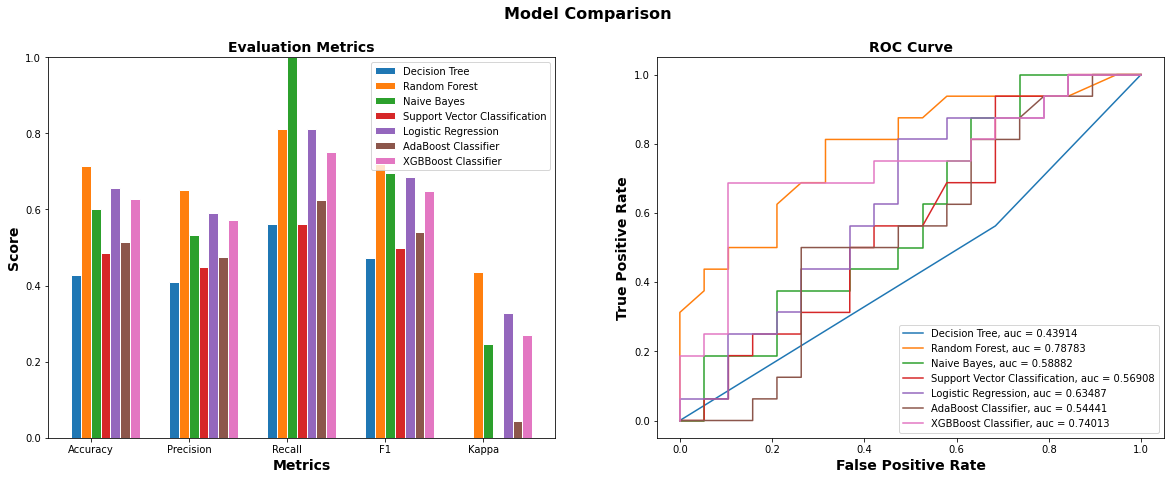

In [ ]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(20)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.1
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
svc_score = [svc_eval['acc'], svc_eval['prec'], svc_eval['rec'], svc_eval['f1'], svc_eval['kappa']]
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1'],lr_eval['kappa']]
adab_score = [adab_eval['acc'], adab_eval['prec'], adab_eval['rec'], adab_eval['f1'],adab_eval['kappa']]
xgb_score = [xgb_eval['acc'], xgb_eval['prec'], xgb_eval['rec'], xgb_eval['f1'], xgb_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r5 = [x + barWidth for x in r3]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r5, svc_score, width=barWidth, edgecolor='white', label='Support Vector Classification')
ax1.bar(r6, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r7, adab_score, width=barWidth, edgecolor='white', label='AdaBoost Classifier')
ax1.bar(r8, xgb_score, width=barWidth, edgecolor='white', label='XGBBoost Classifier')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold',fontsize=14)
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold',fontsize=14)
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(svc_eval['fpr'], svc_eval['tpr'], label='Support Vector Classification, auc = {:0.5f}'.format(svc_eval['auc']))
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))
ax2.plot(adab_eval['fpr'], adab_eval['tpr'], label='AdaBoost Classifier, auc = {:0.5f}'.format(adab_eval['auc']))
ax2.plot(xgb_eval['fpr'], xgb_eval['tpr'], label='XGBBoost Classifier, auc = {:0.5f}'.format(xgb_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold',fontsize=14)
ax2.set_ylabel('True Positive Rate', fontweight='bold',fontsize=14)

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

**NOVEL TARGETS**

In [ ]:
from sklearn.preprocessing import StandardScaler

data = pd.read_excel('/content/drive/MyDrive/imp_docs/project15/Predict.xlsx')
data.drop(['Node','Entry_Names'],axis = 1,inplace=True)
# Convert the DataFrame object into NumPy array otherwise you will not be able to impute
values = data.values

# Now impute it
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
Data = imputer.fit_transform(values)
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(Data)
pd.DataFrame(normalizedData).to_csv('/content/drive/MyDrive/imp_docs/project15/out1.csv')
data=pd.read_csv('/content/drive/MyDrive/imp_docs/project15/out1.csv',header=0)

X = data.iloc[:,0:38]  #independent columns

# make probability predictions with the model
predictions = rf.predict(X)
predictions = pd.DataFrame(predictions, columns=['Prediction'])
my_new_df = pd.concat([data, predictions], axis =1)
my_new_df.to_excel("/content/drive/MyDrive/imp_docs/project15/prediction_results.xlsx")